In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xr
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

#import sklearn
#print(sklearn.__version__)

In [2]:
# read csv file 
telco = pd.read_csv("~/Documents/Training/DataCamp/Predicting_customer_churn/churn.csv")

In [6]:
# check the data structure
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [8]:
telco.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account_Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Vmail_Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day_Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Eve_Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Night_Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
Intl_Mins,3333.0,10.237294,2.791840,0.00,8.50,10.30,12.10,20.00
CustServ_Calls,3333.0,1.562856,1.315491,0.00,1.00,1.00,2.00,9.00
Day_Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day_Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve_Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00


## check how many churners does the dataset have, and how many non-churners?

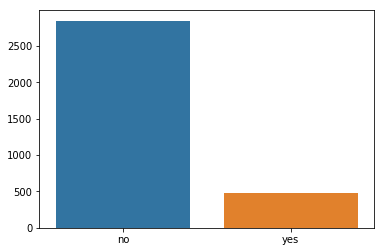

In [4]:
y = telco["Churn"].value_counts()
sns.barplot(y.index, y.values)

In [5]:
y_True = telco["Churn"][telco["Churn"] == "yes"]
print ("Churn Percentage = "+str( (y_True.shape[0] / telco["Churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


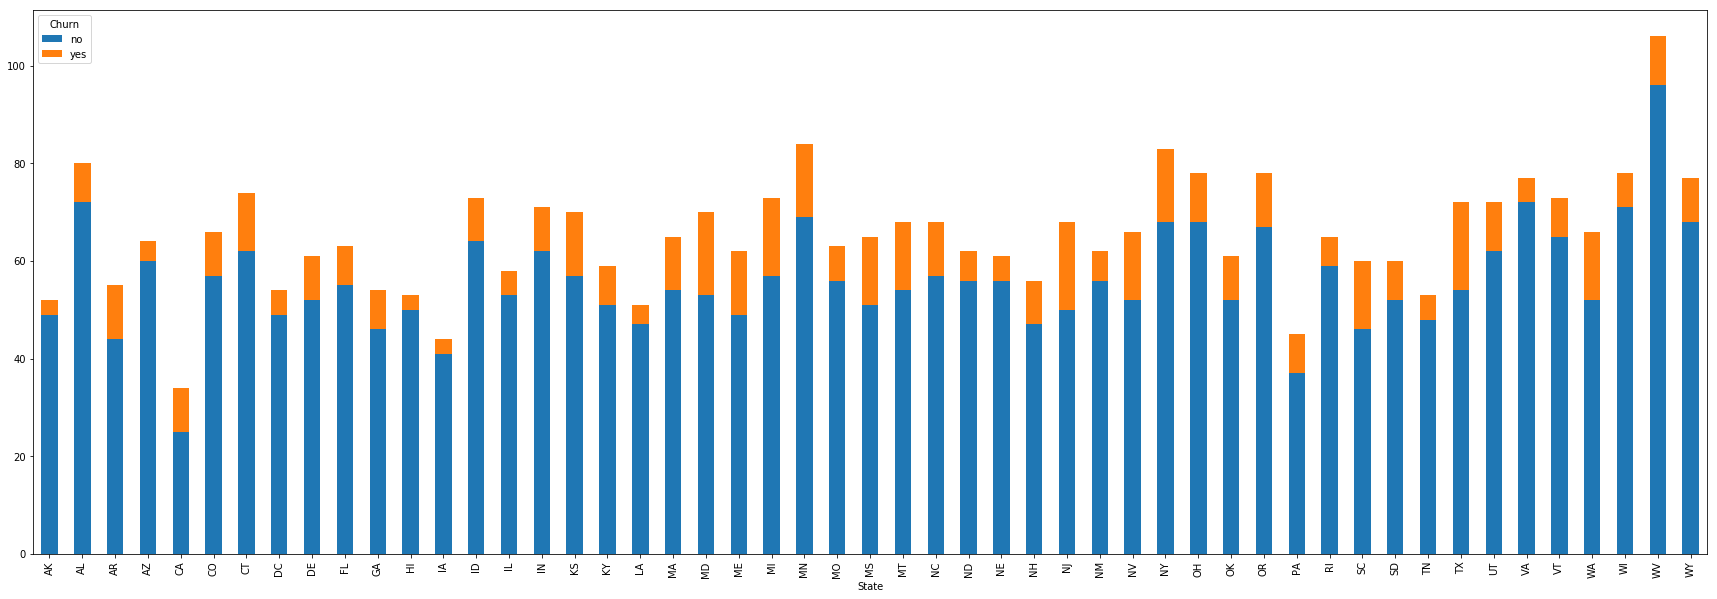

In [6]:
# Count the number of churners and non-churners by State
# print(telco.groupby('State')['Churn'].value_counts())
telco.groupby(["State", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

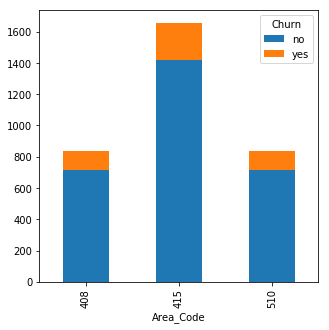

In [7]:
# Count the number of churners and non-churners by area code
telco.groupby(["Area_Code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

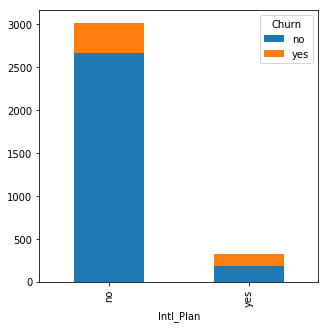

In [8]:
# Count the number of churners and non-churners by International plan
telco.groupby(["Intl_Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

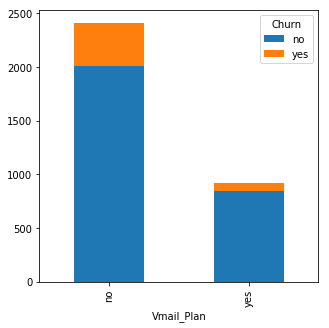

In [9]:
# Count the number of churners and non-churners by International plan
telco.groupby(["Vmail_Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

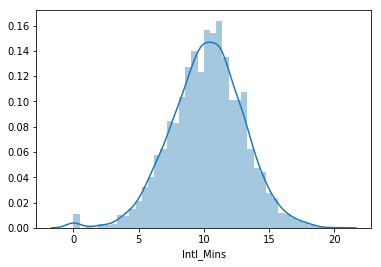

In [10]:
# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'])

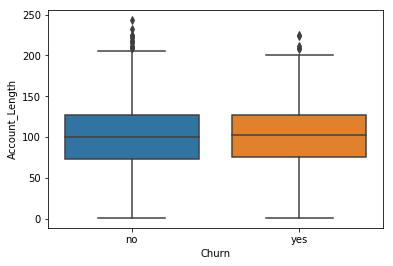

In [11]:
# Create the box plot, check if there is differece in the account length 
# It seems there is no difference
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = telco)

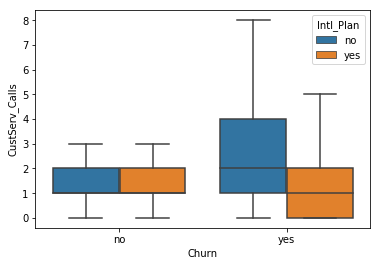

In [12]:
# Add "Intl_Plan" as a third variable
# customers who do churn end up leaving more customer service calls, 
# unless these customers also have an international plan, 
# in which case they leave fewer customer service calls.
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

In [13]:
#  Preprocessing (Encoding, scaling, dropping and creating features 
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [14]:
# Encoding binary features, categorical -> numerical
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0 , 'yes':1})

In [15]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco.State)
# telco = telco.join(telco_state)

In [16]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [17]:
# Drop the unnecessary features that don't provide any predictive power, axis = 1 indicates column 
telco = telco.drop(['Area_Code', 'Phone'], axis=1)

In [18]:
telco.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276


In [19]:
# Dropping highly correlated features, which provide no additional infomation to the model
telco = telco.drop(['Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge'], axis=1)

In [20]:
telco = telco.drop(['State'], axis=1)

In [21]:
# Create feature variable
X = telco.drop('Churn', axis=1)
# X = telco.join(telco_state)

In [22]:
X.shape
X.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Eve_Calls,Night_Calls,Intl_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,99,91,3
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,103,103,3
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,110,104,5
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,88,89,7
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,122,121,3


In [23]:
features = X.columns 
X = X.values.astype(np.float)
# Standardize Feature Matrix values
X = StandardScaler().fit_transform(X)

In [24]:
print(features)
X

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls',
       'Eve_Calls', 'Night_Calls', 'Intl_Calls'],
      dtype='object')


array([[ 0.67648946,  1.23488274,  1.56676695, ..., -0.05594035,
        -0.46549436, -0.60119509],
       [ 0.14906505,  1.30794844, -0.33373776, ...,  0.14486653,
         0.14782467, -0.60119509],
       [ 0.9025285 , -0.59175986,  1.16830364, ...,  0.49627857,
         0.19893459,  0.21153386],
       ...,
       [-1.83505538, -0.59175986,  0.01881963, ..., -2.11421085,
        -0.46549436,  0.61789834],
       [ 2.08295458, -0.59175986,  0.62477766, ..., -0.80896614,
         1.88556193,  2.24335625],
       [-0.67974475,  1.23488274,  1.00304237, ..., -0.90936958,
        -1.18103324, -0.19483061]])

In [25]:
# Create target variable
y = telco['Churn'].values.astype(np.int)
y.size
y

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

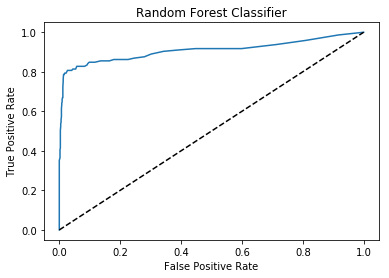

[[846   9]
 [ 48  97]]
Accurancy score: 0.943
Precision Score: 0.915
Recall Score: 0.669
f1-Score: 0.773
AUC Score: 0.908


In [27]:
# Instantiate the classifier: random forest classifier     
clf = RandomForestClassifier(n_estimators=100)

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# ROC curve
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Print the accuracy of the trained classifier 
print('Accurancy score: {:.3f}'.format(clf.score(X_test, y_test)))

# Print the precision
print('Precision Score: {:.3f}'.format(precision_score(y_test,y_pred)))

# Print the recall
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

# Print the F1 score
print('f1-Score: {:.3f}'.format(f1_score(y_test, y_pred)))

# Print the AUC
print('AUC Score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob)))

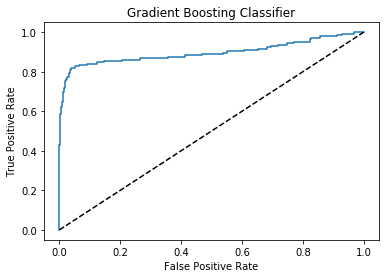

[[841  14]
 [ 41 104]]
Accurancy score: 0.945
Precision Score: 0.881
Recall Score: 0.717
f1-Score: 0.791
AUC Score: 0.897


In [28]:
# Instantiate the classifier   
clf = GradientBoostingClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# ROC curve
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting Classifier")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Print the accuracy of the trained classifier 
print('Accurancy score: {:.3f}'.format(clf.score(X_test, y_test)))

# Print the precision
print('Precision Score: {:.3f}'.format(precision_score(y_test,y_pred)))

# Print the recall
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

# Print the F1 score
print('f1-Score: {:.3f}'.format(f1_score(y_test, y_pred)))

# Print the AUC
print('AUC Score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob)))

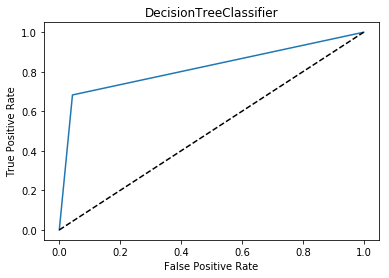

[[818  37]
 [ 46  99]]
Accurancy score: 0.917
Precision Score: 0.728
Recall Score: 0.683
f1-Score: 0.705
AUC Score: 0.820


In [29]:
# Instantiate the classifier 
clf = DecisionTreeClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# ROC curve
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DecisionTreeClassifier")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Print the accuracy of the trained classifier 
print('Accurancy score: {:.3f}'.format(clf.score(X_test, y_test)))

# Print the precision
print('Precision Score: {:.3f}'.format(precision_score(y_test,y_pred)))

# Print the recall
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

# Print the F1 score
print('f1-Score: {:.3f}'.format(f1_score(y_test, y_pred)))

# Print the AUC
print('AUC Score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob)))

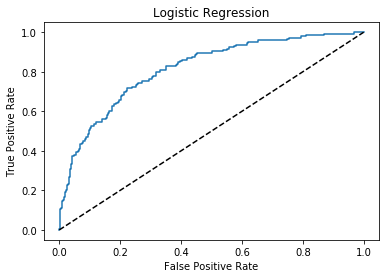

[[829  26]
 [108  37]]
Accurancy score: 0.866
Precision Score: 0.587
Recall Score: 0.255
f1-Score: 0.356
AUC Score: 0.815


In [30]:
# Instantiate the classifier
clf = LogisticRegression(solver='lbfgs')

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# ROC curve
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Print the accuracy of the trained classifier 
print('Accurancy score: {:.3f}'.format(clf.score(X_test, y_test)))

# Print the precision
print('Precision Score: {:.3f}'.format(precision_score(y_test,y_pred)))

# Print the recall
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

# Print the F1 score
print('f1-Score: {:.3f}'.format(f1_score(y_test, y_pred)))

# Print the AUC
print('AUC Score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob)))

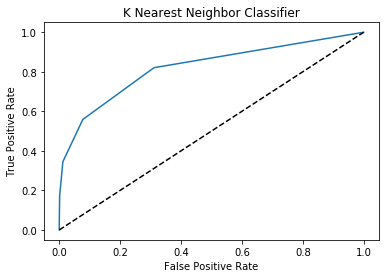

[[845  10]
 [ 95  50]]
Accurancy score: 0.895
Precision Score: 0.833
Recall Score: 0.345
f1-Score: 0.488
AUC Score: 0.821


In [31]:
# Instantiate the classifier
clf = KNeighborsClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# ROC curve
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K Nearest Neighbor Classifier")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Print the accuracy of the trained classifier 
print('Accurancy score: {:.3f}'.format(clf.score(X_test, y_test)))

# Print the precision
print('Precision Score: {:.3f}'.format(precision_score(y_test,y_pred)))

# Print the recall
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

# Print the F1 score
print('f1-Score: {:.3f}'.format(f1_score(y_test, y_pred)))

# Print the AUC
print('AUC Score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob)))

Final Model Selection 
Gradient Boosting seems to do comparatively for this case

In [32]:
param_grid = {'n_estimators': np.arange(10, 101)}

# Call GridSearchCV
clf_cv = GridSearchCV(RandomForestClassifier(), param_grid)

# Fit the model
clf_cv.fit(X, y)

# Print the optimal parameters
print(clf_cv.best_params_)


/Users/yingli/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 85}


In [33]:
gbc = GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              }

# Call GridSearchCV
grid_search = GridSearchCV(gbc, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

Visualizing feature importances      

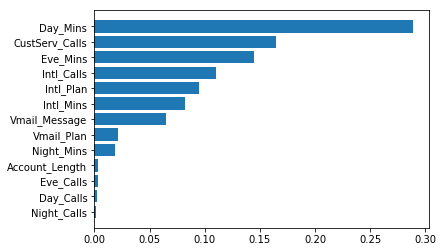

In [35]:
# Calculate feature importances
importances = gbc.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = features[sorted_index]

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()
